In [1]:
%load_ext autoreload
%autoreload 2
import simulation

In [2]:
import numpy as np
np.random.seed(1)

model = simulation.NKModel(N=8, K=2, R=6, G=3, U=0.1)
model.simulate_one(True, True)

Current State: (0, 0, 1, 0, 0, 1, 1, 0)                    
Local value: -0.13240992642392826                    
New State    : (0, 0, 1, 0, 1, 1, 1, 0)                    
Cost: 0.1                    
Is Local: True                    
Predicted Value: -0.1308564295529664                    
Result: 0.11109133250907632                    
Average Value: -0.030856429552966375

Neighbors:
    (1, 0, 1, 0, 0, 1, 1, 0): -0.3136602884540771
    (0, 1, 1, 0, 0, 1, 1, 0): -0.21958893089725068
    (0, 0, 0, 0, 0, 1, 1, 0): 0.12024306182456262
    (0, 0, 1, 1, 0, 1, 1, 0): -0.1706543542769773
    (0, 0, 1, 0, 1, 1, 1, 0): 0.21109133250907633
    (0, 0, 1, 0, 0, 0, 1, 0): -0.15566380299385044
    (0, 0, 1, 0, 0, 1, 0, 0): -0.07441144033712643
    (0, 0, 1, 0, 0, 1, 1, 1): 0.02378785627451932


(0.11109133250907632, 0.1, True)

In [3]:
print(model.simulate_one(False, False))
print(model.simulate_one(False, False))
print(model.simulate_one(False, False))
print(model.simulate_one(False, False))
print(model.simulate_one(False, False))

(0.26728911520752385, 0.1, True)
(0.4195035393343125, 0.1, True)
(0.12739426768629714, 0.1, True)
(-0.26819694361226143, 0.1, True)
(-0.342091431250584, 0.1, True)


In [4]:
np.random.seed(123)
model = simulation.NKModel(N=8, K=2, R=6, G=3, U=0.1)
model.simulate(10)

(0.20614471179108645, 0.7)

The second value represents the ration of local search. Above, in ten simulations, 7 times them chose the nearby cells (the state with only one element changed).

In [5]:
model = simulation.NKModel(N=8, K=2, R=0, G=3, U=0.1)
model.simulate(10)

(0.0017408770693829304, 1.0)

When R is equal to 0, which means the agent can only do local search, the ratio is always 1.0.

Simulating: 100%|██████████| 8000/8000 [00:21<00:00, 379.22iteration/s]


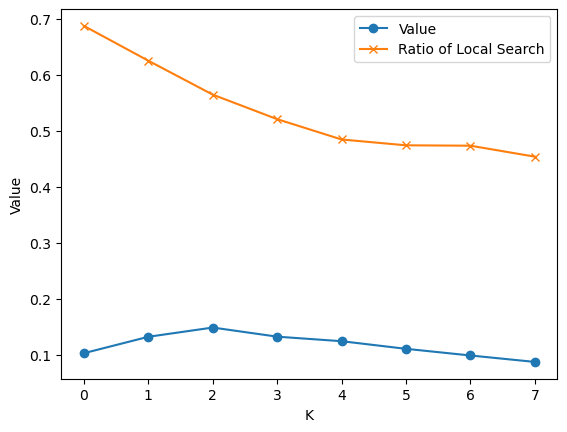

In [6]:
# Change the number of K when the granularity is 3
import matplotlib.pyplot as plt
from tqdm import tqdm

value_lst = []
ratio_local_lst = []
num_iterations = 1000

with tqdm(total=num_iterations * 8, desc="Simulating", unit="iteration") as pbar:
    for i in range(8):
        buffer_lst = []
        buffer_ratio_local = []
        for j in range(num_iterations):
            model = simulation.NKModel(N=8, K=i, R=15, G=3, U=0.1)
            result, ratio_local = model.simulate(10)
            buffer_lst.append(result)
            buffer_ratio_local.append(ratio_local)
            pbar.update(1)
        value_lst.append(np.mean(buffer_lst))
        ratio_local_lst.append(np.mean(buffer_ratio_local))

plt.plot(range(8), value_lst, marker="o", label="Value")
plt.plot(range(8), ratio_local_lst, marker="x", label="Ratio of Local Search")
plt.xlabel("K")
plt.ylabel("Value")
plt.legend()
plt.show()

Simulating: 100%|██████████| 8000/8000 [00:21<00:00, 375.00iteration/s]


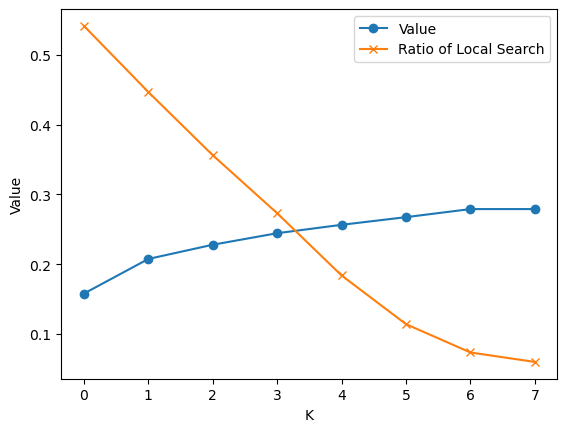

In [7]:
# Change the number of K, when the granularity is 1 (the representation is very precise)
import matplotlib.pyplot as plt
from tqdm import tqdm

value_lst = []
ratio_local_lst = []
num_iterations = 1000

with tqdm(total=num_iterations * 8, desc="Simulating", unit="iteration") as pbar:
    for i in range(8):
        buffer_lst = []
        buffer_ratio_local = []
        for j in range(num_iterations):
            model = simulation.NKModel(N=8, K=i, R=15, G=1, U=0.1)
            result, ratio_local = model.simulate(10)
            buffer_lst.append(result)
            buffer_ratio_local.append(ratio_local)
            pbar.update(1)
        value_lst.append(np.mean(buffer_lst))
        ratio_local_lst.append(np.mean(buffer_ratio_local))

plt.plot(range(8), value_lst, marker="o", label="Value")
plt.plot(range(8), ratio_local_lst, marker="x", label="Ratio of Local Search")
plt.xlabel("K")
plt.ylabel("Value")
plt.legend()
plt.show()

Simulating: 100%|██████████| 10000/10000 [00:24<00:00, 413.57iteration/s]


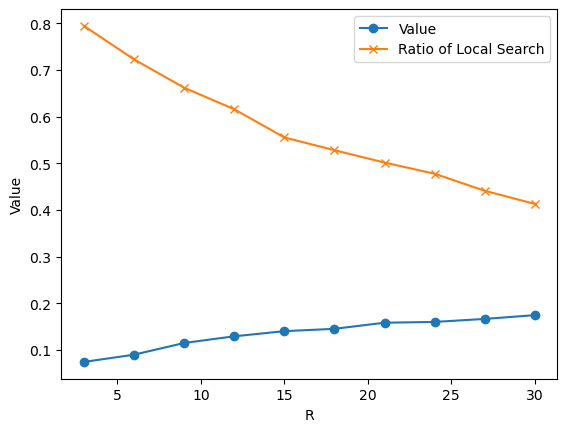

In [8]:
# Change the number of R
import matplotlib.pyplot as plt
from tqdm import tqdm

value_lst = []
ratio_local_lst = []
num_iterations = 1000

with tqdm(total=num_iterations * 10, desc="Simulating", unit="iteration") as pbar:
    for i in [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]:
        buffer_lst = []
        buffer_ratio_local = []
        for j in range(num_iterations):
            model = simulation.NKModel(N=8, K=2, R=i, G=3, U=0.1)
            result, ratio_local = model.simulate(10)
            buffer_lst.append(result)
            buffer_ratio_local.append(ratio_local)
            pbar.update(1)
        value_lst.append(np.mean(buffer_lst))
        ratio_local_lst.append(np.mean(buffer_ratio_local))

plt.plot([3, 6, 9, 12, 15, 18, 21, 24, 27, 30], value_lst, marker="o", label="Value")
plt.plot([3, 6, 9, 12, 15, 18, 21, 24, 27, 30], ratio_local_lst, marker="x", label="Ratio of Local Search")
plt.xlabel("R")
plt.ylabel("Value")
plt.legend()
plt.show()

Simulating: 100%|██████████| 9000/9000 [00:27<00:00, 330.23iteration/s]


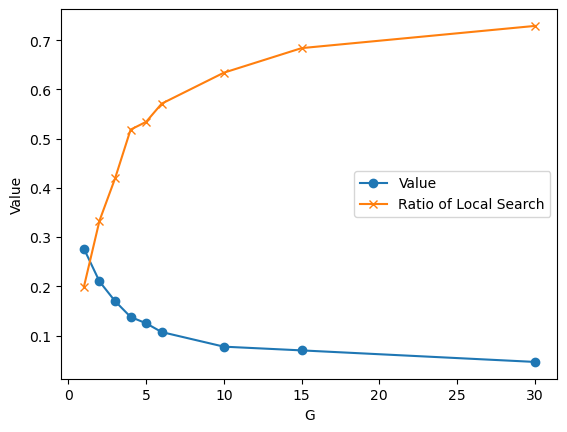

In [9]:
# Change the number of G
import matplotlib.pyplot as plt
from tqdm import tqdm

value_lst = []
ratio_local_lst = []
num_iterations = 1000

with tqdm(total=num_iterations * 9, desc="Simulating", unit="iteration") as pbar:
    for i in [1, 2, 3, 4, 5, 6, 10, 15, 30]:
        buffer_lst = []
        buffer_ratio_local = []
        for j in range(num_iterations):
            model = simulation.NKModel(N=8, K=2, R=30, G=i, U=0.1)
            result, ratio_local = model.simulate(10)
            buffer_lst.append(result)
            buffer_ratio_local.append(ratio_local)
            pbar.update(1)
        value_lst.append(np.mean(buffer_lst))
        ratio_local_lst.append(np.mean(buffer_ratio_local))

plt.plot([1, 2, 3, 4, 5, 6, 10, 15, 30], value_lst, marker="o", label="Value")
plt.plot([1, 2, 3, 4, 5, 6, 10, 15, 30], ratio_local_lst, marker="x", label="Ratio of Local Search")
plt.xlabel("G")
plt.ylabel("Value")
plt.legend()
plt.show()

Simulating: 100%|██████████| 8000/8000 [00:34<00:00, 229.89iteration/s]


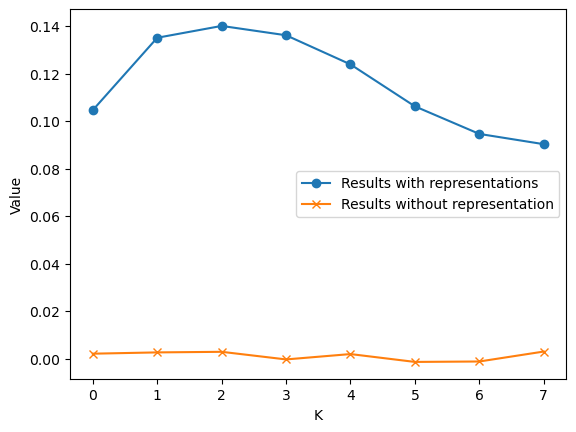

In [10]:
# Results with and without representations
import matplotlib.pyplot as plt
from tqdm import tqdm

reprentation_lst = []
only_local_lst = []
num_iterations = 1000

with tqdm(total=num_iterations * 8, desc="Simulating", unit="iteration") as pbar:
    for i in range(8):
        buffer_lst = []
        buffer_local = []
        for j in range(num_iterations):
            model1 = simulation.NKModel(N=8, K=i, R=15, G=3, U=0.1)
            result1, _ = model1.simulate(10)
            buffer_lst.append(result1)
            model2 = simulation.NKModel(N=8, K=i, R=0, G=3, U=0.1)
            result2, _ = model2.simulate(10)
            buffer_local.append(result2)
            pbar.update(1)
        reprentation_lst.append(np.mean(buffer_lst))
        only_local_lst.append(np.mean(buffer_local))

plt.plot(range(8), reprentation_lst, marker="o", label="Results with representations")
plt.plot(range(8), only_local_lst, marker="x", label="Results without representation")
plt.xlabel("K")
plt.ylabel("Value")
plt.legend()
plt.show()

Simulating: 100%|██████████| 8000/8000 [00:42<00:00, 188.63iteration/s]


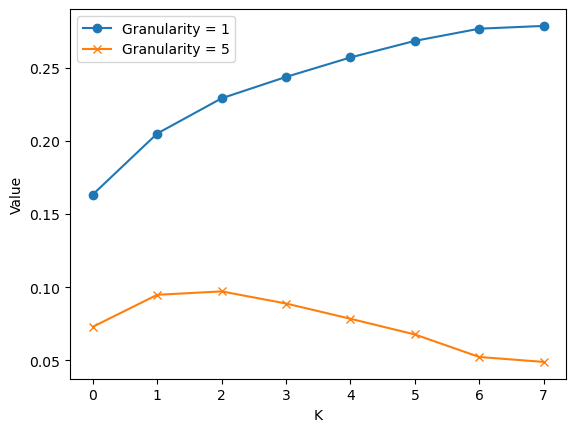

In [11]:
# Comparison between granularity 1 and 5 while changing K
import matplotlib.pyplot as plt
from tqdm import tqdm

reprentation_lst = []
only_local_lst = []
num_iterations = 1000

with tqdm(total=num_iterations * 8, desc="Simulating", unit="iteration") as pbar:
    for i in range(8):
        buffer_lst = []
        buffer_local = []
        for j in range(num_iterations):
            model1 = simulation.NKModel(N=8, K=i, R=15, G=1, U=0.1)
            result1, _ = model1.simulate(10)
            buffer_lst.append(result1)
            model2 = simulation.NKModel(N=8, K=i, R=15, G=5, U=0.1)
            result2, _ = model2.simulate(10)
            buffer_local.append(result2)
            pbar.update(1)
        reprentation_lst.append(np.mean(buffer_lst))
        only_local_lst.append(np.mean(buffer_local))

plt.plot(range(8), reprentation_lst, marker="o", label="Granularity = 1")
plt.plot(range(8), only_local_lst, marker="x", label="Granularity = 5")
plt.xlabel("K")
plt.ylabel("Value")
plt.legend()
plt.show()

Simulating: 100%|██████████| 8000/8000 [00:53<00:00, 148.26iteration/s]


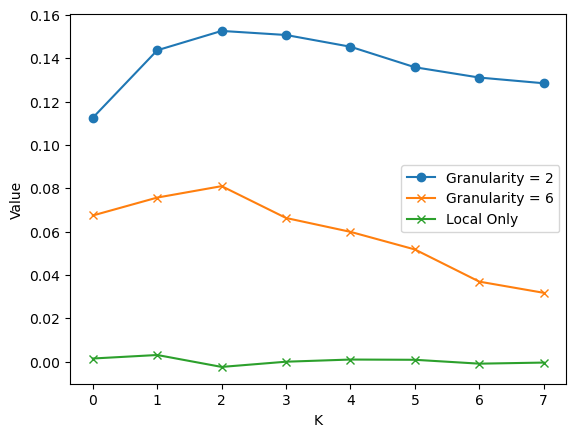

In [12]:
# Comparison between granularity 2 and 6, and without representation while changing K
import matplotlib.pyplot as plt
from tqdm import tqdm

reprentation_lst = []
only_local_lst = []
lst_3 = []
num_iterations = 1000

with tqdm(total=num_iterations * 8, desc="Simulating", unit="iteration") as pbar:
    for i in range(8):
        buffer_lst = []
        buffer_local = []
        buffer_local2 = []
        for j in range(num_iterations):
            model1 = simulation.NKModel(N=8, K=i, R=12, G=2, U=0.1)
            result1, _ = model1.simulate(10)
            buffer_lst.append(result1)
            model2 = simulation.NKModel(N=8, K=i, R=12, G=6, U=0.1)
            result2, _ = model2.simulate(10)
            buffer_local.append(result2)
            model3 = simulation.NKModel(N=8, K=i, R=0, G=10, U=0.1)
            result3, _ = model3.simulate(10)
            buffer_local2.append(result3)
            pbar.update(1)
        reprentation_lst.append(np.mean(buffer_lst))
        only_local_lst.append(np.mean(buffer_local))
        lst_3.append(np.mean(buffer_local2))

plt.plot(range(8), reprentation_lst, marker="o", label="Granularity = 2")
plt.plot(range(8), only_local_lst, marker="x", label="Granularity = 6")
plt.plot(range(8), lst_3, marker="x", label="Local Only")
plt.xlabel("K")
plt.ylabel("Value")
plt.legend()
plt.show()

TO DO:
1. calculate the maximun in the successive simulation runs, and draw the line to compare
2. make the probability of long jump
3. robust check: cost coefficient, the radius of nearby cells, simulaiton iterations